# 📌 Fase 1. Business Understanding

## 🎯 1. Objective

El objetivo de este proyecto es desarrollar un **modelo predictivo** que permita determinar la probabilidad de que una persona haya sido diagnosticada con **diabetes o azúcar alta** (variable QS109) a partir de características sociodemográficas, clínicas y de estilo de vida, específicamente:  

- **Edad de la persona** (QS23)
- **Sexo** (QS14)
- **Mediciones antropométricas**: peso (QS900), talla (QS901), perímetro abdominal (QS907).
- **Presión arterial**: sistólica y diastólica (QS903S, QS903D, QS905S, QS905D), y diagnóstico de hipertensión (QS102).
- **Estilo de vida**: consumo de tabaco (QS200–QS205) y alcohol (QS206–QS210).
- **Dieta**: frecuencia de consumo de frutas, verduras y jugos (QS213C–QS220CV).

# 📌 Fase 2. Data Understanding

## 📥 2. Data collection

In [12]:
import pandas as pd
import numpy as np


data = pd.read_csv("CSALUD01_2024.csv", 
                    encoding='utf-8',      # o 'latin-1' si hay caracteres especiales
                    sep=',',               # separador (por defecto es coma)
                    header=0,              # fila que contiene los nombres de columnas
                    index_col=None)        # si quieres usar una columna como índice

# data = pd.read_csv("dataproyecto.csv", 
#                    encoding='utf-8',      # o 'latin-1' si hay caracteres especiales
#                    sep=',',               # separador (por defecto es coma)
#                    header=0,              # fila que contiene los nombres de columnas
#                    index_col=None)       # si quieres usar una columna como índice

In [39]:
# Resumen general
data.info()
print('data.columns:',data.columns)
print('data.shape:',data.shape)
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31458 entries, 0 to 31457
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   QSSEXO  31455 non-null  float64
 1   QS23    31455 non-null  float64
 2   QS26    31455 non-null  float64
 3   QS27    28614 non-null  object 
 4   QS101   15309 non-null  float64
 5   QS102   31455 non-null  float64
 6   QS107   31455 non-null  float64
 7   QS108   8868 non-null   float64
 8   QS109   31455 non-null  float64
 9   QS202   2894 non-null   float64
 10  QS203C  356 non-null    float64
 11  QS205C  356 non-null    float64
 12  QS206   31441 non-null  float64
 13  QS213C  28413 non-null  float64
 14  QS215C  13789 non-null  float64
 15  QS217C  5414 non-null   float64
 16  QS219C  22761 non-null  float64
 17  QS304   8167 non-null   float64
 18  QS500   31431 non-null  float64
 19  QS900   31423 non-null  float64
 20  QS901   31423 non-null  float64
 21  QS902   31423 non-null  float64
 22

,QSSEXO,QS23,QS26,QS27,QS101,QS102,QS107,QS108,QS109,QS202,...,QS900,QS901,QS902,QS903S,QS903D,QS905S,QS905D,QS906,QS907,QS908
0,2.0,38.0,1.0,A,NaN,2.0,2.0,NaN,2.0,NaN,...,70.4,152.5,4.0,126.0,93.0,123.0,95.0,1.0,98.9,1.0
1,2.0,17.0,1.0,B,10.0,2.0,1.0,10.0,2.0,NaN,...,49.8,160.2,4.0,86.0,68.0,90.0,65.0,1.0,68.4,1.0
2,2.0,65.0,1.0,A,14.0,2.0,2.0,NaN,2.0,NaN,...,49.7,136.2,1.0,123.0,79.0,121.0,74.0,1.0,86.3,1.0
3,1.0,33.0,1.0,A,10.0,2.0,1.0,10.0,2.0,2.0,...,76.0,158.2,1.0,123.0,89.0,118.0,87.0,1.0,100.4,1.0
4,1.0,30.0,1.0,A,NaN,2.0,2.0,NaN,2.0,NaN,...,66.0,159.4,1.0,107.0,70.0,119.0,72.0,1.0,87.2,1.0
5,2.0,32.0,1.0,A,NaN,2.0,2.0,NaN,2.0,NaN,...,72.9,157.0,4.0,128.0,88.0,126.0,86.0,1.0,91.7,1.0
6,2.0,34.0,1.0,A,NaN,2.0,2.0,NaN,2.0,NaN,...,57.3,153.3,4.0,90.0,56.0,96.0,65.0,1.0,80.2,1.0
7,2.0,18.0,1.0,A,40.0,2.0,2.0,NaN,2.0,NaN,...,67.6,151.5,4.0,105.0,75.0,108.0,74.0,1.0,93.2,1.0
8,1.0,45.0,1.0,A,NaN,2.0,2.0,NaN,2.0,NaN,...,85.7,171.6,1.0,133.0,88.0,134.0,87.0,1.0,101.1,1.0
9,2.0,33.0,1.0,A,96.0,2.0,1.0,10.0,2.0,NaN,...,81.2,158.3,4.0,109.0,75.0,108.0,75.0,1.0,108.1,1.0


## 📊 3. Descriptive analysis

### 3.1 Análisis descriptivo

In [40]:
#Resumen estadístico de todas las variables (describe()).
data.describe(include="all").T # incluye categóricas y numéricas

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
QSSEXO,31455.0,NaN,NaN,NaN,1.579208,0.493694,1.0,1.0,2.0,2.0,2.0
QS23,31455.0,NaN,NaN,NaN,39.865554,16.955663,15.0,27.0,36.0,50.0,97.0
QS26,31455.0,NaN,NaN,NaN,1.09032,0.286644,1.0,1.0,1.0,1.0,2.0
QS27,28614,10,A,22075,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QS101,15309.0,NaN,NaN,NaN,15.553465,11.310768,10.0,11.0,14.0,14.0,98.0
QS102,31455.0,NaN,NaN,NaN,1.917056,0.318492,1.0,2.0,2.0,2.0,8.0
QS107,31455.0,NaN,NaN,NaN,1.726657,0.508646,1.0,1.0,2.0,2.0,8.0
QS108,8868.0,NaN,NaN,NaN,16.0477,10.84849,10.0,11.0,14.0,20.0,98.0
QS109,31455.0,NaN,NaN,NaN,1.964107,0.186025,1.0,2.0,2.0,2.0,2.0
QS202,2894.0,NaN,NaN,NaN,1.876641,0.328905,1.0,2.0,2.0,2.0,2.0


In [41]:
# Separar los datos segú sus Tipos de variables (numéricas, categóricas). fechas se considera como cat aunque también puedes separr
numeric_data = data.select_dtypes(include=[np.number])
categor_data = data.select_dtypes(exclude=[np.number])
print ("Hay {} variables númericas y {} categóricas en la data".format(numeric_data.shape[1],categor_data.shape[1]))

Hay 28 variables númericas y 1 categóricas en la data


In [42]:
# Puedes ver la Distribución de variables numéricas
numeric_data.describe().T

,count,mean,std,min,25%,50%,75%,max
QSSEXO,31455.0,1.579208,0.493694,1.0,1.0,2.0,2.0,2.0
QS23,31455.0,39.865554,16.955663,15.0,27.0,36.0,50.0,97.0
QS26,31455.0,1.090320,0.286644,1.0,1.0,1.0,1.0,2.0
QS101,15309.0,15.553465,11.310768,10.0,11.0,14.0,14.0,98.0
QS102,31455.0,1.917056,0.318492,1.0,2.0,2.0,2.0,8.0
QS107,31455.0,1.726657,0.508646,1.0,1.0,2.0,2.0,8.0
QS108,8868.0,16.047700,10.848490,10.0,11.0,14.0,20.0,98.0
QS109,31455.0,1.964107,0.186025,1.0,2.0,2.0,2.0,2.0
QS202,2894.0,1.876641,0.328905,1.0,2.0,2.0,2.0,2.0
QS203C,356.0,25.671348,11.532263,10.0,18.0,21.0,30.0,78.0


In [43]:
#Variables únicas en cada variable
categor_data.describe(include="all").T

,count,unique,top,freq
QS27,28614,10,A,22075


In [70]:
# Conteo de valores únicos en categóricas (Las posibles importantes)
for col in ['QS109','QSSEXO', 'QS23', 'QS102', 'QS107', 'QS108', 'QS202', 'QS219C', 'QS213C', 'QS219C', 'QS900', 'QS901', 'QS907', 'QS905S', 'QS905D', 'QS906']:
    print(f"\n{col}:\n", data[col].value_counts())

# Conteo de la variable objetivo
#data["COD_DIAG"].value_counts()



QS109:
 QS109
2.0    30326
1.0     1129
Name: count, dtype: int64

QSSEXO:
 QSSEXO
2.0    18219
1.0    13236
Name: count, dtype: int64

QS23:
 QS23
32.0    976
31.0    967
36.0    942
29.0    929
30.0    918
       ... 
94.0     11
96.0      9
97.0      9
93.0      5
95.0      4
Name: count, Length: 83, dtype: int64

QS102:
 QS102
2.0    28713
1.0     2723
8.0       19
Name: count, dtype: int64

QS107:
 QS107
2.0    22542
1.0     8868
8.0       45
Name: count, dtype: int64

QS108:
 QS108
14.0    2725
20.0    2274
10.0    1679
11.0    1394
15.0     281
40.0     144
96.0     116
12.0      91
13.0      85
30.0      22
42.0      20
41.0      20
31.0      11
98.0       6
Name: count, dtype: int64

QS202:
 QS202
2.0    2537
1.0     357
Name: count, dtype: int64

QS219C:
 QS219C
2.0    5788
3.0    4795
1.0    4712
7.0    3848
4.0    2209
5.0    1096
6.0     313
Name: count, dtype: int64

QS213C:
 QS213C
7.0    9979
3.0    5553
2.0    4874
4.0    2990
1.0    2768
5.0    1800
6.0     449
Name:

### 3.2 Análisis descriptivo (gráficos)

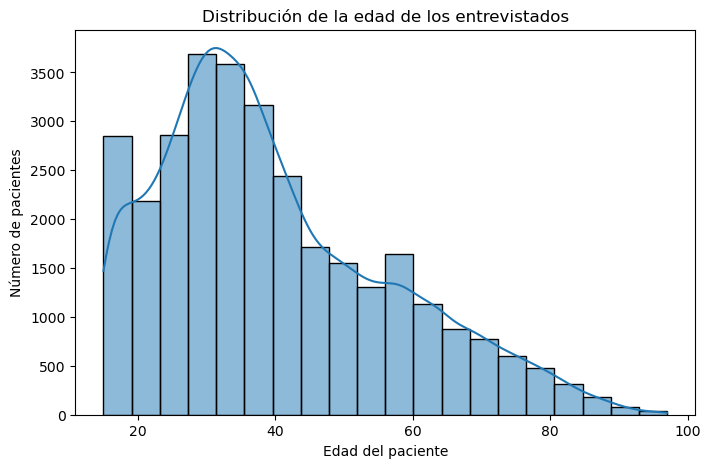

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de la edad de los pacientes
plt.figure(figsize=(8,5))
sns.histplot(data['QS23'], bins=20, kde=True)
plt.title("Distribución de la edad de los entrevistados")
plt.xlabel("Edad del paciente")
plt.ylabel("Número de pacientes")
plt.show()

👉 El gráfico muestra que la mayoría de los entrevistados se concentra en edades jóvenes y adultas jóvenes, principalmente entre los 20 y 40 años, mientras que a partir de los 50 años la frecuencia comienza a disminuir de forma progresiva y en los 70 años o más los casos son poco representativos. Esto indica que la muestra está compuesta mayoritariamente por población en edad productiva, con menor proporción de adultos mayores.

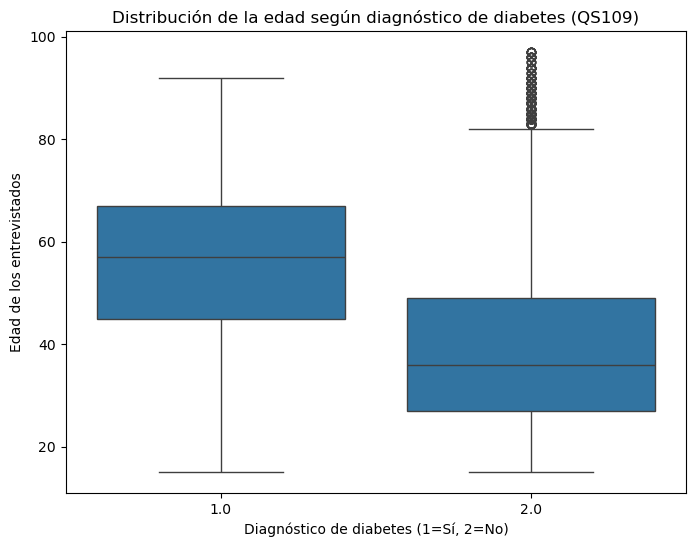

In [46]:
# Relación entre Edad y Diagnostico de Diabetes
plt.figure(figsize=(8,6))  # tamaño más compacto que con 18
sns.boxplot(x="QS109", y="QS23", data=data)  # QS109 = sí/no, QS23 = edad
plt.xlabel("Diagnóstico de diabetes (1=Sí, 2=No)")
plt.ylabel("Edad de los entrevistados")
plt.title("Distribución de la edad según diagnóstico de diabetes (QS109)")
plt.show()

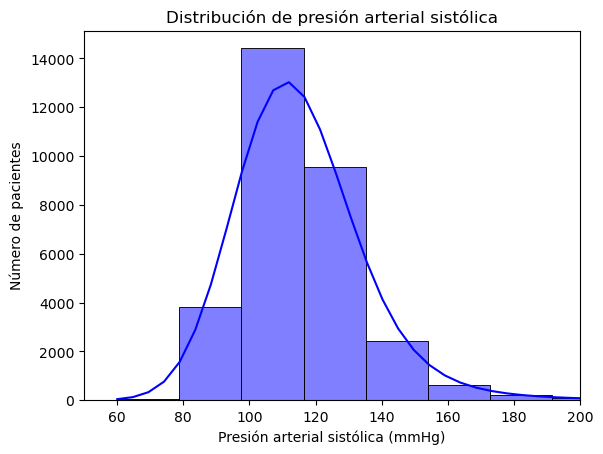

In [47]:
# Distribución de Presión Arterial Sistólica (QS905S)
sns.histplot(data['QS905S'], bins=50, kde=True, color="blue")
plt.xlim(50, 200) 
plt.xlabel("Presión arterial sistólica (mmHg)")
plt.ylabel("Número de pacientes")
plt.title("Distribución de presión arterial sistólica")
plt.show()

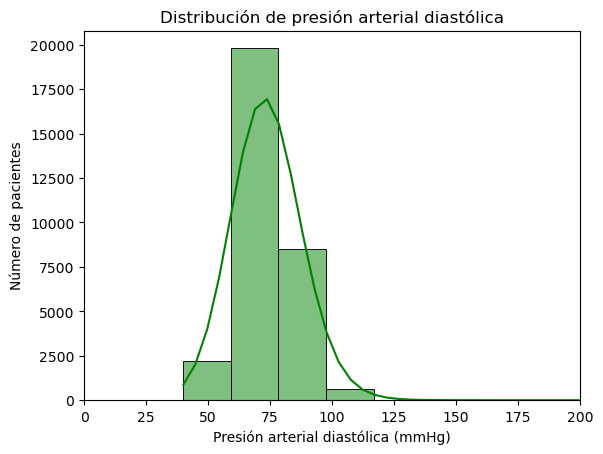

In [48]:
# Distribución de Presión Arterial Diastólica (QS905D)
sns.histplot(data['QS905D'], bins=50, kde=True, color="green")
plt.xlim(0, 200) 
plt.xlabel("Presión arterial diastólica (mmHg)")
plt.ylabel("Número de pacientes")
plt.title("Distribución de presión arterial diastólica")
plt.show()

### 3.3 Análisis exploratorio (con estadísticas): Correlaciones y cruces de variables

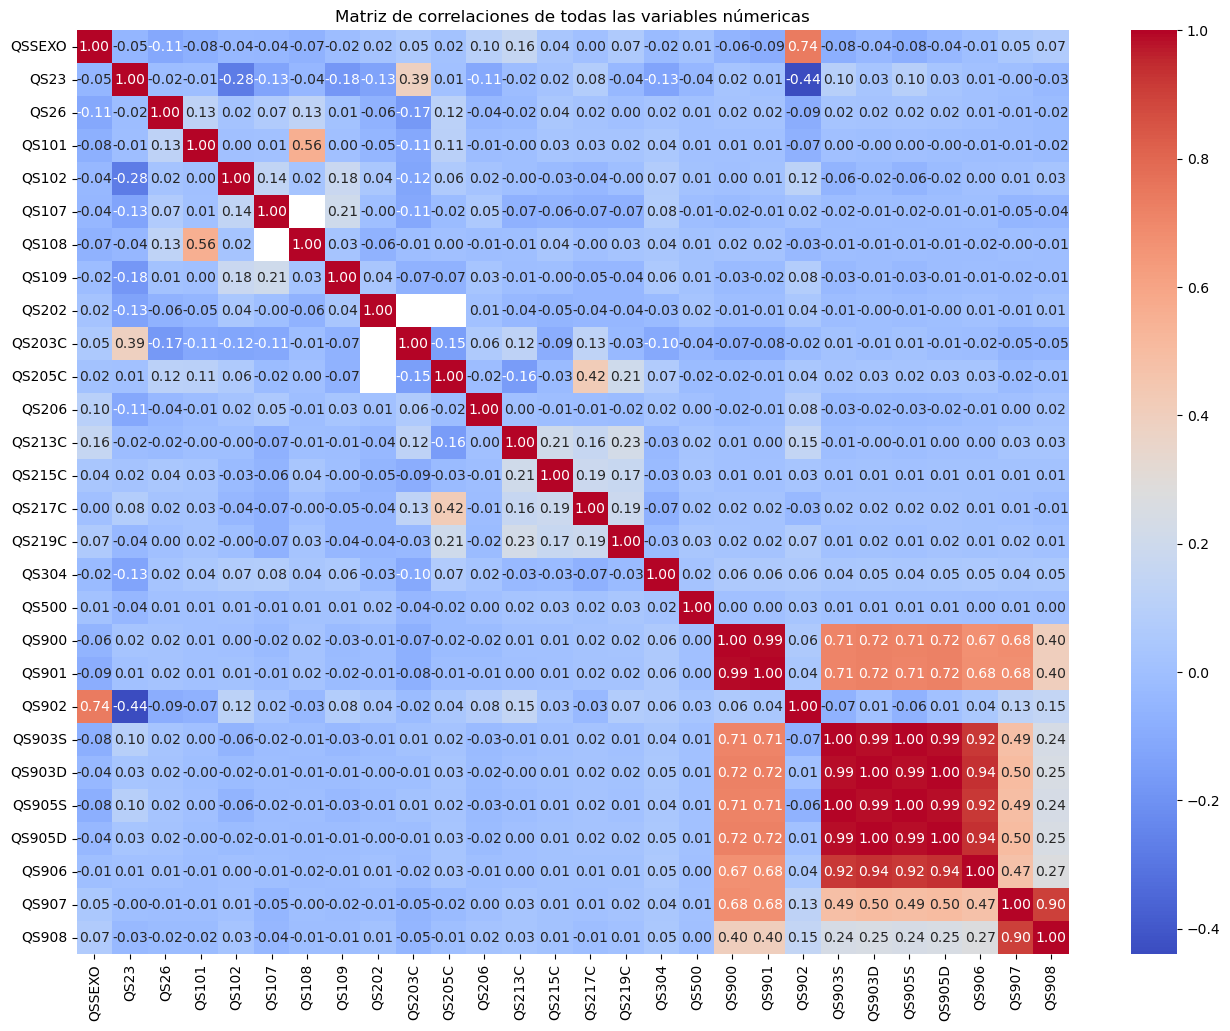

QSSEXO,1.0,2.0
QS109,,
1.0,37.732507,62.267493
2.0,42.240981,57.759019


In [66]:
# Correlaciones de todas las variables númericas
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlaciones de todas las variables númericas")
plt.show()

# Cruce de variables categóricas con el objetivo
pd.crosstab(data['QS109'], data['QSSEXO'], normalize='index') * 100

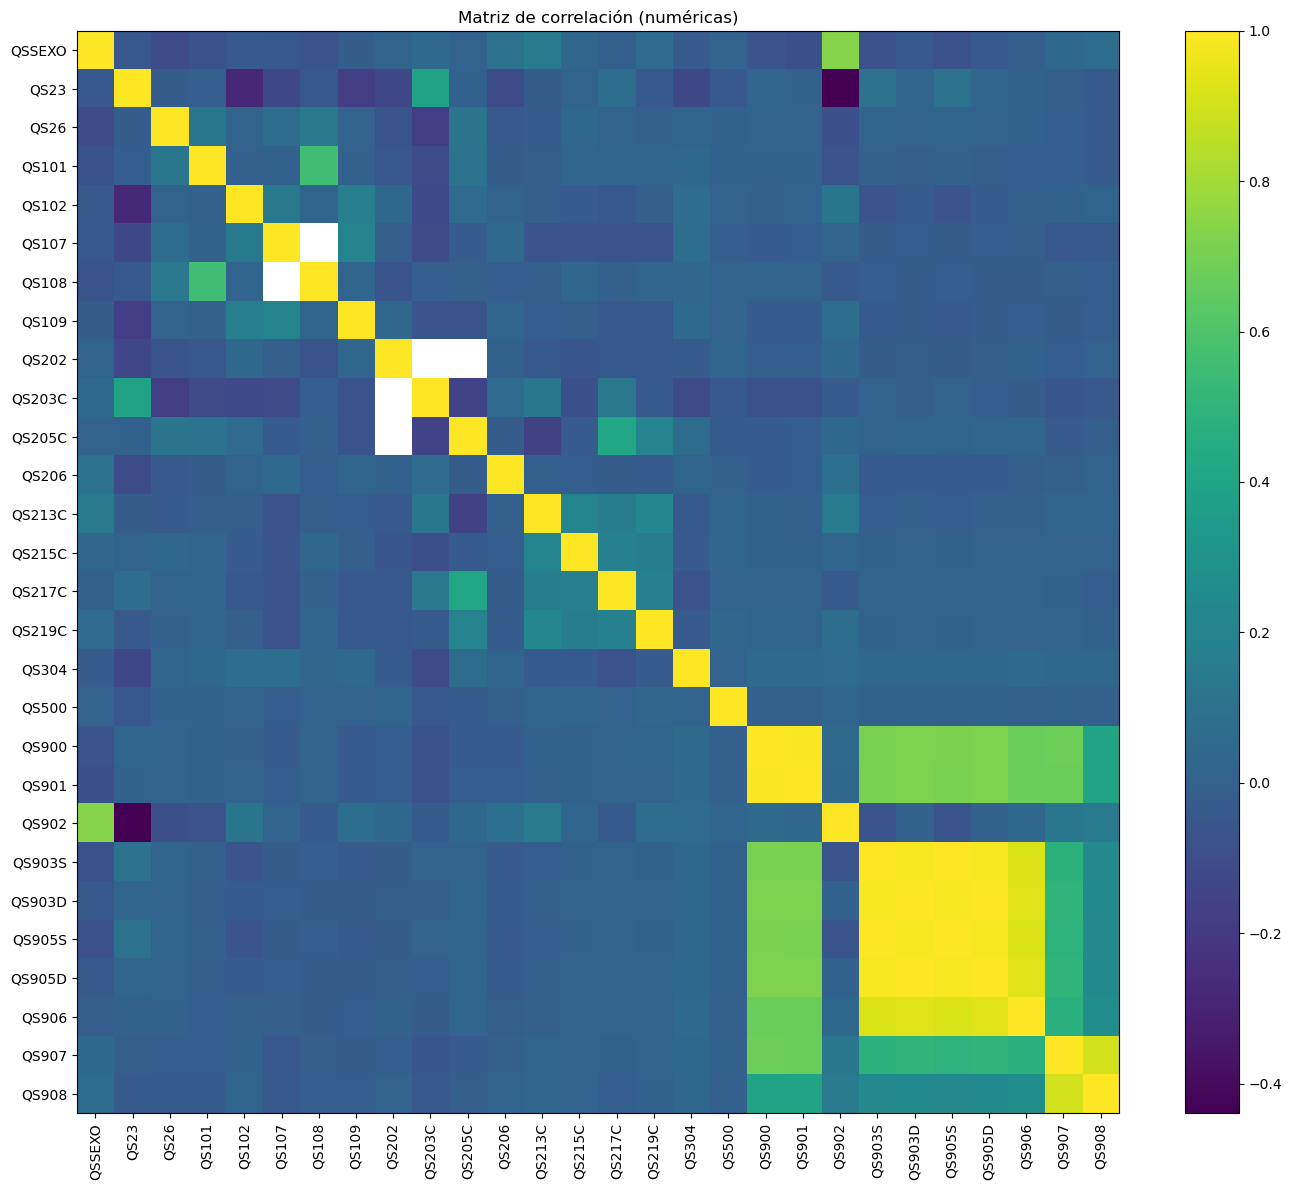

In [55]:
# Correlaciones numéricas (heatmap)
num_cols = data.select_dtypes(include=['int64','float64']).columns
corr = data[num_cols].corr()
plt.figure(figsize=(14,12))
im = plt.imshow(corr, interpolation='nearest', aspect='auto')
plt.title('Matriz de correlación (numéricas)')
plt.colorbar(im)
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.tight_layout()
plt.show()

### 3.4 Diagnóstico de calidad inicial

In [56]:
# Valores faltantes
print(data.isnull().sum())

QSSEXO        3
QS23          3
QS26          3
QS27       2844
QS101     16149
QS102         3
QS107         3
QS108     22590
QS109         3
QS202     28564
QS203C    31102
QS205C    31102
QS206        17
QS213C     3045
QS215C    17669
QS217C    26044
QS219C     8697
QS304     23291
QS500        27
QS900        35
QS901        35
QS902        35
QS903S       33
QS903D       33
QS905S       33
QS905D       33
QS906        33
QS907        33
QS908        33
dtype: int64


In [62]:
# Posibles inconsistencias
print("Mínimo y máximo edad:", data['QS23'].min(), data['QS23'].max())
print("Peso mínimo y máximo:", data['QS900'].min(), data['QS900'].max())
print("Talla mínima y máxima:", data['QS901'].min(), data['QS901'].max())
print("Presión sistólica min/max:", data['QS905S'].min(), data['QS905S'].max())
print("Presión diastólica min/max:", data['QS905D'].min(), data['QS905D'].max())
print("Perímetro abdominal min/max:", data['QS907'].min(), data['QS907'].max())

Mínimo y máximo edad: 15.0 97.0
Peso mínimo y máximo: 24.5 999.9
Talla mínima y máxima: 119.0 999.9
Presión sistólica min/max: 60.0 999.0
Presión diastólica min/max: 40.0 999.0
Perímetro abdominal min/max: 55.0 999.9


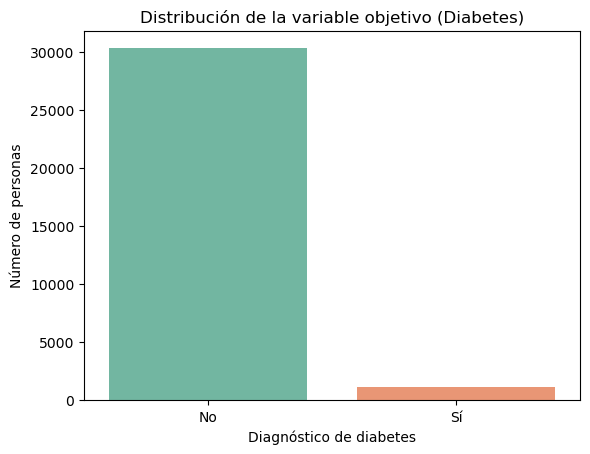

In [74]:
# Distribución de diabetes
data['DIABETES'] = data['QS109'].map({1: "Sí", 2: "No"})
sns.countplot(x='DIABETES', hue='DIABETES', data=data, palette='Set2', legend=False)
plt.title("Distribución de la variable objetivo (Diabetes)")
plt.xlabel("Diagnóstico de diabetes")
plt.ylabel("Número de personas")
plt.show()

El gráfico muestra la distribución de la variable objetivo diabetes (QS109) en la población encuestada: la gran mayoría de personas no reporta diagnóstico de diabetes (“No”), mientras que solo una fracción muy pequeña sí ha sido diagnosticada (“Sí”). Esto refleja un fuerte desbalance de clases, con muchos más casos negativos que positivos en la muestra.

In [75]:
#Valores faltantes: identificar y cuantificar (df.isnull().sum()).
na_counts = data.isna().sum().sort_values(ascending=False)
na_pct = (na_counts/len(data)*100).round(2)
quality_missing = pd.DataFrame({'missing': na_counts, 'missing_%': na_pct})
display(quality_missing)

,missing,missing_%
QS203C,31102,98.87
QS205C,31102,98.87
QS202,28564,90.80
QS217C,26044,82.79
QS304,23291,74.04
QS108,22590,71.81
QS215C,17669,56.17
QS101,16149,51.34
QS219C,8697,27.65
QS213C,3045,9.68


In [76]:
# Definir los rangos clínicos esperados
suspects = data[
    (data['QS23'] < 15) | (data['QS23'] > 100) |         # Edad fuera de rango
    (data['QS900'] < 30) | (data['QS900'] > 200) |       # Peso (kg)
    (data['QS901'] < 120) | (data['QS901'] > 220) |      # Talla (cm)
    (data['QS905S'] < 70) | (data['QS905S'] > 250) |     # Presión sistólica (mmHg)
    (data['QS905D'] < 40) | (data['QS905D'] > 140) |     # Presión diastólica (mmHg)
    (data['QS905S'] < data['QS905D']) |                  # Inconsistencia: sistólica < diastólica
    (data['QS907'] < 50) | (data['QS907'] > 200)         # Perímetro abdominal (cm)
]

print("Número de registros sospechosos (fuera de rangos clínicos):", len(suspects))

# Mostrar algunos ejemplos
display(suspects[['QS23','QS900','QS901','QS905S','QS905D','QS907']].head(10))

Número de registros sospechosos (fuera de rangos clínicos): 849


,QS23,QS900,QS901,QS905S,QS905D,QS907
51,32.0,54.0,158.1,87.0,88.0,78.3
60,28.0,76.0,163.5,91.0,64.0,999.9
88,20.0,50.8,147.2,101.0,49.0,999.9
113,23.0,52.7,154.5,90.0,51.0,999.9
114,25.0,57.3,157.2,92.0,61.0,999.9
152,87.0,999.9,999.9,92.0,58.0,999.9
217,22.0,75.7,163.5,121.0,71.0,999.9
271,41.0,57.2,149.2,86.0,63.0,999.9
299,50.0,999.9,999.9,999.0,999.0,999.9
401,23.0,999.9,999.9,999.0,999.0,999.9


#### 3.5 Perfil estadístico comparativo (Diagnosticados con diabetes vs NO Diagnosticados con diabetes)

In [78]:
# Medias comparativas numéricas
data.groupby('QS109').mean(numeric_only=True)

,QSSEXO,QS23,QS26,QS101,QS102,QS107,QS108,QS202,QS203C,QS205C,...,QS900,QS901,QS902,QS903S,QS903D,QS905S,QS905D,QS906,QS907,QS908
QS109,,,,,,,,,,,,,,,,,,,,,
1.0,1.622675,55.651019,1.068202,15.500000,1.625332,1.184234,15.230185,1.808989,29.125000,5.470588,...,94.297163,177.223138,1.696809,135.655142,86.869681,133.695922,85.990248,1.022163,127.529078,1.112589
2.0,1.577590,39.277880,1.091143,15.556718,1.927917,1.746851,16.142444,1.878788,25.508824,4.244838,...,78.409325,167.318881,2.355405,122.811830,80.871307,121.069380,80.023732,1.013863,114.542866,1.089415


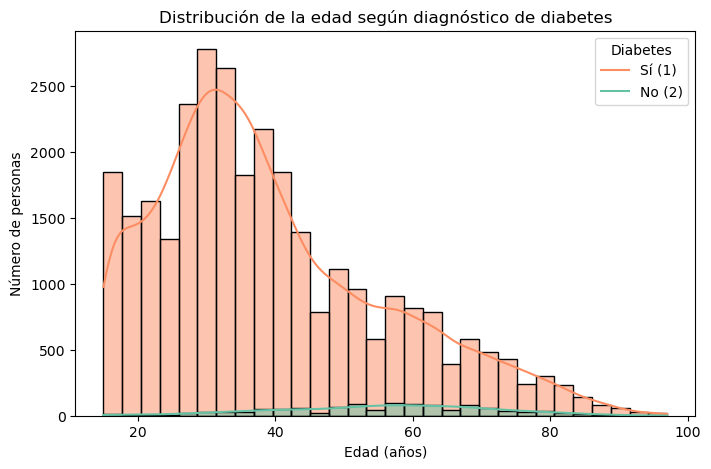

In [79]:
# Comparación gráfica de variables numéricas
plt.figure(figsize=(8,5))
sns.histplot(data=data, x='QS23', hue='QS109', bins=30, kde=True, palette='Set2')
plt.title("Distribución de la edad según diagnóstico de diabetes")
plt.xlabel("Edad (años)")
plt.ylabel("Número de personas")
plt.legend(title="Diabetes", labels=["Sí (1)", "No (2)"])
plt.show()

In [84]:
perfil_num = data.groupby('QS109')[['QS23','QS900','QS901','QS907','QS905S','QS905D']]
perfil_num = perfil_num.agg(['mean','median','std','min','max']).round(3)
display(perfil_num)

QS23                              QS900                               \
         mean median     std   min   max    mean median      std   min    max   
QS109                                                                           
1.0    55.651   57.0  15.554  15.0  92.0  94.297   69.6  147.865  38.3  999.9   
2.0    39.278   36.0  16.721  15.0  97.0  78.409   65.5  104.635  24.5  999.9   

       ...   QS905S                              QS905D                       \
       ...     mean median     std   min    max    mean median     std   min   
QS109  ...                                                                     
1.0    ...  133.696  121.0  91.992  75.0  999.0  85.990   75.5  95.379  42.0   
2.0    ...  121.069  113.0  75.446  60.0  999.0  80.024   73.0  77.656  40.0   

              
         max  
QS109         
1.0    999.0  
2.0    999.0  

[2 rows x 30 columns]

### 3.6 Hallazgos

#### Hallazgos del Paso 3: Descriptive analysis

##### 1. Distribución general del dataset
- El dataset contiene **31459 registros y 29 variables**.
- Las variables abarcan información demográfica (edad, sexo), clínica (peso, talla, perímetro abdominal, presión arterial, hipertensión) y de estilo de vida/dieta (tabaco, alcohol, frutas, verduras, jugos).
- La variable objetivo es QS109 (diagnóstico de diabetes o azúcar alta).


##### 2. Variables principales
- **Sexo**: Distribución relativamente equilibrada entre hombres y mujeres. 
- **Hipertensión (QS102)**: Se observa una proporción significativa de personas diagnosticadas, lo cual es un factor de riesgo.  
- **Consumo de tabaco y alcohol**: Predominan respuestas “No consume”, lo que muestra baja prevalencia en la muestra.
- **Edad (QS23)**: el rango va de jóvenes adultos hasta personas mayores. Se concentra más en adultos de mediana edad. 
- **Peso, talla y perímetro abdominal**: Se identifican valores coherentes con el rango esperado, pero también aparecen registros anormales codificados como 999, lo que no representa un valor real. Estos deben tratarse como valores faltantes para no distorsionar los análisis.  
- **Presión arterial**: existen casos con valores elevados, lo que puede asociarse a riesgo cardiovascular.

##### 4. Valores faltantes
- Hay valores nulos en algunas variables, especialmente en preguntas de dieta y consumo.  
- Además, se detectaron valores atípicos artificiales (999) en variables como peso, talla y perímetro abdominal, lo cual refleja errores de captura o registros sin respuesta.
- Estos valores deben ser recodificados como NaN para evitar que afecten estadísticas y modelos.

##### 5. Correlaciones
- Existe correlación positiva entre peso, perímetro abdominal y presión arterial, lo que refleja el efecto de la obesidad sobre la salud cardiovascular.  
- Edad se asocia con mayor prevalencia de hipertensión y diabetes.
- El análisis comparativo sugiere que personas mayores y con mayor perímetro abdominal tienen más probabilidad de diagnóstico positivo de diabetes.

##### 6. Perfil comparativo: con diabetes vs sin diabetes
- Con diagnóstico de diabetes: tienden a ser de mayor edad, con valores más altos en perímetro abdominal y mayor prevalencia de hipertensión.
- Sin diagnóstico: suelen ser más jóvenes, con menor perímetro abdominal y menos casos de hipertensión.


# 📌 Fase 3. Data Preparation

## 🧹 4. Data Cleaning

#### 4.1 Selección inicial de variables claves

Queremos construir un modelo que prediga si una persona puede tener diabetes (1) o no (0) sin usar exámenes de laboratorio o mediciones de sangre. Por ello, conservaremos factores como datos demográficos, hábitos de vida, alimentación, mediciones antropométricas, presión arterial y antecedentes relevantes de salud.

##### 🔴 Variables candidatas a eliminar
Estas no aportan a la predicción de diabetes porque son identificadores, metadatos o están fuera del foco de salud metabólica:

- **Identificadores**: `ID1`, `HHID`, `QHCLUSTER`, `QHNUMBER`, `QHHOME`, `QSNUMERO`, `QS20C`, etc.  
- **Metadatos de encuesta**: `QSRESULT`, `QSRESINF`, `QSMEF`, `QSINTM`, `QSINTY`, `QSTOTVISIT`, etc.  
- **Variables administrativas**: resultados del entrevistador, códigos de visita, llaves del hogar/persona.  
- **Variables redundantes de “no sabe / rehúsa / otra”** cuando ya existe la información principal.  
- **Preguntas alejadas de salud metabólica**: cáncer cervicouterino, mamografías, VIH, tuberculosis, violencia, entre otras.

---

##### 🟢 Variables candidatas a conservar
Estas sí son relevantes porque se relacionan directamente con factores de riesgo y diagnóstico de diabetes:

##### 📊 Datos demográficos
- **QS23** → Edad del entrevistado (años cumplidos).  
- **QSSEXO** → Sexo del entrevistado.  

---

##### 🚬🍷 Hábitos y estilo de vida
- **QS200** → ¿Actualmente fuma cigarrillos u otros productos de tabaco?
- **QS201** → En los últimos 30 días ha fumado cigarrillos
- **QS202** → Fuma diariamente
- **QS203C** → Edad que empezó a fumar diariamente
- **QS205C** → Edad que empezó a fumar diariamente
- **QS206** → ¿En los últimos 12 meses consumió bebidas alcohólicas?  
- **QS207C** → Frecuencia de consumo de alcohol.  
- **QS208** → Número de tragos estándar consumidos en un día típico.  
- **QS209** → Número de tragos en una sola ocasión en los últimos 30 días.  
- **QS210** → Consumo excesivo de alcohol en los últimos 12 meses.  
- **QS213C** → Frecuencia de consumo de frutas en la última semana.  
- **QS214C** → Frecuencia de consumo de verduras en la última semana.  
- **QS219C** → Consumo de bebidas azucaradas en la última semana.  

---

##### 🩺 Mediciones clínicas
- **QS900** → Peso del entrevistado (kg).  
- **QS901** → Talla/estatura del entrevistado (cm).  
- **QS903S** → Presión arterial sistólica (mmHg).  
- **QS903D** → Presión arterial diastólica (mmHg).  
- **QS905S** → Segunda toma de presión sistólica (mmHg).  
- **QS905D** → Segunda toma de presión diastólica (mmHg).  
- **QS907** → Perímetro abdominal (cm).  

---

##### ⚕️ Antecedentes y diagnóstico
- **QS102** → ¿Alguna vez un médico u otro profesional de la salud le dijo que tenía hipertensión?  
- **QS107** → ¿Alguna vez un médico u otro profesional de la salud le dijo que tenía niveles altos de glucosa en sangre?  

---

##### 🎯 Variable objetivo
- **QS109** → ¿Alguna vez un médico u otro profesional de la salud le diagnosticó diabetes?  


In [33]:
# Variables candidatas a conservar
features_keep = ["QS23", "QSSEXO",
    "QS200", "QS201", "QS202", "QS203C", "QS205C",
    "QS206", "QS207C", "QS208", "QS209", "QS210", 
    "QS211C", "QS212A", "QS212B", "QS212C", "QS212D",
    "QS212E", "QS212F", "QS212G", "QS212O",
    "QS213C", "QS214C", "QS215C", "QS216C",
    "QS217C", "QS218C", "QS219C", "QS220CV", "QS220CC",
    "QS900", "QS901", "QS903S", "QS903D", 
    "QS905S", "QS905D", "QS907",
    "QS102", "QS103C", "QS103U",
    "QS107", "QS108", "QS110C", "QS110U",
    "QS111"
]

# Variable objetivo
target = ["QS109"]  # Le diagnosticaron diabetes

# Crear nuevo DataFrame solo con estas variables
df_sel = data[features_keep+target]

# Información básica del nuevo dataset
print("df_sel.shape:", df_sel.shape)
print("df_sel.columns:", df_sel.columns.tolist())
df_sel.head(10)

df_sel.shape: (34018, 46)
df_sel.columns: ['QS23', 'QSSEXO', 'QS200', 'QS201', 'QS202', 'QS203C', 'QS205C', 'QS206', 'QS207C', 'QS208', 'QS209', 'QS210', 'QS211C', 'QS212A', 'QS212B', 'QS212C', 'QS212D', 'QS212E', 'QS212F', 'QS212G', 'QS212O', 'QS213C', 'QS214C', 'QS215C', 'QS216C', 'QS217C', 'QS218C', 'QS219C', 'QS220CV', 'QS220CC', 'QS900', 'QS901', 'QS903S', 'QS903D', 'QS905S', 'QS905D', 'QS907', 'QS102', 'QS103C', 'QS103U', 'QS107', 'QS108', 'QS110C', 'QS110U', 'QS111', 'QS109']


,QS23,QSSEXO,QS200,QS201,QS202,QS203C,QS205C,QS206,QS207C,QS208,...,QS907,QS102,QS103C,QS103U,QS107,QS108,QS110C,QS110U,QS111,QS109
0,38,2,2,,,,,1,17,2,...,98.9,2,,,2,,,,,2
1,17,2,2,,,,,2,,,...,68.4,2,,,1,10,,,,2
2,65,2,2,,,,,2,,,...,86.3,2,,,2,,,,,2
3,33,1,1,1,2,,,1,17,1,...,100.4,2,,,1,10,,,,2
4,30,1,2,,,,,1,21,2,...,87.2,2,,,2,,,,,2
5,32,2,2,,,,,1,18,1,...,91.7,2,,,2,,,,,2
6,34,2,2,,,,,1,26,2,...,80.2,2,,,2,,,,,2
7,18,2,2,,,,,1,17,1,...,93.2,2,,,2,,,,,2
8,45,1,2,,,,,1,19,1,...,101.1,2,,,2,,,,,2
9,33,2,2,,,,,1,24,1,...,108.1,2,,,1,10,,,,2


In [34]:
#  Revisar duplicados (en todo el registro de estas columnas)
duplicates_count = df_sel.duplicated().sum()
# df_sel = df_sel.drop_duplicates()
duplicates_count

2532

In [35]:
# Revisar valores faltantes
df_sel.isnull().sum()

# Conteo total de valores nulos en el DataFrame
print("Total de valores nulos:", df_sel.isnull().sum().sum())

Total de valores nulos: 0


In [20]:
#  Porcentaje de valores nulos por columna (más útil para limpieza)
print("\nPorcentaje de nulos por columna:")
print((df_sel.isnull().mean() * 100).round(2))


Porcentaje de nulos por columna:
QS23       0.0
QSSEXO     0.0
QS25N      0.0
QS25A      0.0
QS200      0.0
QS201      0.0
QS202      0.0
QS203C     0.0
QS205C     0.0
QS206      0.0
QS207C     0.0
QS208      0.0
QS209      0.0
QS210      0.0
QS211C     0.0
QS212A     0.0
QS212B     0.0
QS212C     0.0
QS212D     0.0
QS212E     0.0
QS212F     0.0
QS212G     0.0
QS212O     0.0
QS213C     0.0
QS214C     0.0
QS215C     0.0
QS216C     0.0
QS217C     0.0
QS218C     0.0
QS219C     0.0
QS220CV    0.0
QS220CC    0.0
QS900      0.0
QS901      0.0
QS903S     0.0
QS903D     0.0
QS905S     0.0
QS905D     0.0
QS907      0.0
QS102      0.0
QS103C     0.0
QS103U     0.0
QS107      0.0
QS108      0.0
QS110C     0.0
QS110U     0.0
QS111      0.0
QS109      0.0
dtype: float64


In [36]:
# Crear una máscara de valores vacíos ("" o solo espacios)
mask_vacios = df_sel.astype(str).apply(lambda col: col.str.strip() == "")

#  Conteo total de vacíos
vacios_totales = mask_vacios.sum().sum()
print("Total de valores vacíos:", vacios_totales)

#  Conteo por columna
print("\nVacios por columna:")
print(mask_vacios.sum())

Total de valores vacíos: 772492

Vacios por columna:
QS23        2534
QSSEXO      2531
QS200       2551
QS201      29089
QS202      31122
QS203C     33662
QS205C     33662
QS206       2551
QS207C      5493
QS208       5132
QS209      12889
QS210      12889
QS211C     23706
QS212A     23706
QS212B     23706
QS212C     23706
QS212D     23706
QS212E     23706
QS212F     23706
QS212G     23706
QS212O     23706
QS213C      5584
QS214C      5603
QS215C     20221
QS216C     20223
QS217C     28603
QS218C     28603
QS219C     11240
QS220CV    13772
QS220CC    31501
QS900       2569
QS901       2569
QS903S      2567
QS903D      2567
QS905S      2567
QS905D      2567
QS907       2567
QS102       2537
QS103C     34018
QS103U     34018
QS107       2537
QS108      25138
QS110C     34018
QS110U     34018
QS111      32889
QS109       2537
dtype: int64


In [37]:
#  Crear máscara de valores vacíos ("" o solo espacios)
mask_vacios = df_sel.astype(str).apply(lambda col: col.str.strip() == "")

#  Calcular porcentaje de vacíos por columna
porcentaje_vacios = mask_vacios.mean() * 100

# Fijar el umbral (ejemplo: 40%)
umbral = 40

# Seleccionar columnas a eliminar y a conservar
cols_a_eliminar = porcentaje_vacios[porcentaje_vacios > umbral].index.tolist()
cols_a_conservar = porcentaje_vacios[porcentaje_vacios <= umbral].index.tolist()

print("Columnas a eliminar (>40% vacíos):", cols_a_eliminar)
print("Columnas que se conservan:", len(cols_a_conservar))

# Crear nuevo DataFrame sin esas columnas
df_filtrado = df_sel.drop(columns=cols_a_eliminar)

print("\n✅ df_filtrado.shape:", df_filtrado.shape)
print("✅ df_filtrado columnas:", df_filtrado.columns.tolist()[:23])

Columnas a eliminar (>40% vacíos): ['QS201', 'QS202', 'QS203C', 'QS205C', 'QS211C', 'QS212A', 'QS212B', 'QS212C', 'QS212D', 'QS212E', 'QS212F', 'QS212G', 'QS212O', 'QS215C', 'QS216C', 'QS217C', 'QS218C', 'QS220CV', 'QS220CC', 'QS103C', 'QS103U', 'QS108', 'QS110C', 'QS110U', 'QS111']
Columnas que se conservan: 21

✅ df_filtrado.shape: (34018, 21)
✅ df_filtrado columnas: ['QS23', 'QSSEXO', 'QS200', 'QS206', 'QS207C', 'QS208', 'QS209', 'QS210', 'QS213C', 'QS214C', 'QS219C', 'QS900', 'QS901', 'QS903S', 'QS903D', 'QS905S', 'QS905D', 'QS907', 'QS102', 'QS107', 'QS109']


In [38]:
df_filtrado.describe()

,QS23,QSSEXO,QS200,QS206,QS207C,QS208,QS209,QS210,QS213C,QS214C,...,QS900,QS901,QS903S,QS903D,QS905S,QS905D,QS907,QS102,QS107,QS109
count,34018,34018,34018,34018,34018,34018,34018,34018,34018,34018,...,34018,34018,34018,34018,34018,34018,34018,34018,34018,34018
unique,84,3,4,4,60,4,4,4,8,13,...,916,556,153,96,147,96,774,4,4,4
top,,2,2,1,,1,2,,7,1,...,,,,,,,,2,2,2
freq,2534,18239,26537,28886,5493,21129,17218,12889,9983,11882,...,2569,2569,2567,2567,2567,2567,2567,28735,22555,30326


##### Diccionario de variables seleccionadas

###### Datos demográficos

- **QS23** → Edad del entrevistado (años cumplidos).  
  - Numérica: valores en **años completos**.  

- **QSSEXO** → Sexo del entrevistado.  
  - `1 = Hombre`  
  - `2 = Mujer`

###### Hábitos y estilo de vida

- **QS200** → ¿Actualmente fuma cigarrillos u otros productos de tabaco?  
  - `1 = Sí`  
  - `2 = No`  

- **QS206** → ¿En los últimos 12 meses consumió bebidas alcohólicas?  
  - `1 = Sí`  
  - `2 = No`  

- **QS207C** → Frecuencia de consumo de alcohol.  
  - `1 = Todos los días`  
  - `2 = 5–6 días por semana`  
  - `3 = 1–4 días por semana`  
  - `4 = 1–3 días por mes`  
  - `5 = Menos de una vez por mes`  
  - `6 = Nunca`  

- **QS208** → Número de tragos estándar consumidos en un día típico.  
  - Numérico (cantidad).  

- **QS209** → Número de tragos en una sola ocasión en los últimos 30 días.  
  - Numérico (cantidad).  

- **QS210** → Consumo excesivo de alcohol en los últimos 12 meses.  
  - `1 = Sí`  
  - `2 = No`  

- **QS213C** → Frecuencia de consumo de frutas en la última semana.  
  - Numérico (días).  

- **QS214C** → Frecuencia de consumo de verduras en la última semana.  
  - Numérico (días).  

- **QS219C** → Consumo de bebidas azucaradas en la última semana.  
  - Numérico (días).  



###### Mediciones clínicas

- **QS900** → Peso del entrevistado.  
  - Numérico (kilogramos).  

- **QS901** → Talla/estatura del entrevistado.  
  - Numérico (centímetros).  

- **QS903S** → Presión arterial sistólica.  
  - Numérico (mmHg).  

- **QS903D** → Presión arterial diastólica.  
  - Numérico (mmHg).  

- **QS905S** → Segunda toma de presión arterial sistólica.  
  - Numérico (mmHg).  

- **QS905D** → Segunda toma de presión arterial diastólica.  
  - Numérico (mmHg).  

- **QS907** → Perímetro abdominal.  
  - Numérico (centímetros).  



###### Antecedentes y diagnóstico

- **QS102** → ¿Alguna vez un médico u otro profesional de la salud le dijo que tenía hipertensión?  
  - `1 = Sí`  
  - `2 = No`  

- **QS107** → ¿Alguna vez un médico u otro profesional de la salud le dijo que tenía niveles altos de glucosa en sangre?  
  - `1 = Sí`  
  - `2 = No`  

- **QS109** → ¿Alguna vez un médico u otro profesional de la salud le diagnosticó diabetes? (**Variable objetivo**).  
  - `1 = Sí`  
  - `2 = No`  


In [39]:
# Revisar filas con muchos vacíos
filas_a_eliminar = df_filtrado[mask_vacios.mean(axis=1) > 0.5]
print("Filas a eliminar:", filas_a_eliminar.shape)
df_filtrado = df_filtrado[mask_vacios.mean(axis=1) <= 0.5]

Filas a eliminar: (16075, 21)


In [41]:
# Ver el % de vacíos por columna (restantes):
mask_vacios_restantes = df_filtrado.astype(str).apply(lambda col: col.str.strip() == "")
print((mask_vacios_restantes.mean() * 100).round(2))

QS23       0.00
QSSEXO     0.00
QS200      0.00
QS206      0.00
QS207C     0.77
QS208      0.30
QS209      8.54
QS210      8.54
QS213C     6.34
QS214C     6.39
QS219C    16.96
QS900      0.02
QS901      0.02
QS903S     0.02
QS903D     0.02
QS905S     0.02
QS905D     0.02
QS907      0.02
QS102      0.00
QS107      0.00
QS109      0.00
dtype: float64


In [42]:
# Lista de variables numéricas para imputar con el promedio
cols_promedio = ["QS900", "QS901", "QS903S", "QS903D", "QS905S", "QS905D", "QS907"]

# Reemplazar vacíos por NaN y luego por el promedio
for col in cols_promedio:
    df_filtrado[col] = pd.to_numeric(df_filtrado[col], errors="coerce")  # asegurar numérico
    df_filtrado[col] = df_filtrado[col].replace("", np.nan)
    df_filtrado[col] = df_filtrado[col].fillna(df_filtrado[col].mean())

# Verificar que no queden vacíos en esas columnas
print(df_filtrado[cols_promedio].isnull().sum())

QS900     0
QS901     0
QS903S    0
QS903D    0
QS905S    0
QS905D    0
QS907     0
dtype: int64


In [43]:
# Ver el % de vacíos por columna (restantes):
mask_vacios_restantes = df_filtrado.astype(str).apply(lambda col: col.str.strip() == "")
print((mask_vacios_restantes.mean() * 100).round(2))

QS23       0.00
QSSEXO     0.00
QS200      0.00
QS206      0.00
QS207C     0.77
QS208      0.30
QS209      8.54
QS210      8.54
QS213C     6.34
QS214C     6.39
QS219C    16.96
QS900      0.00
QS901      0.00
QS903S     0.00
QS903D     0.00
QS905S     0.00
QS905D     0.00
QS907      0.00
QS102      0.00
QS107      0.00
QS109      0.00
dtype: float64


In [49]:
# Columnas críticas donde NO se permiten vacíos
cols_dropna = ["QS207C", "QS208", "QS209", "QS210", "QS213C", "QS214C", "QS219C"]

# 1. Reemplazar vacíos "" por NaN en esas columnas
df_filtrado[cols_dropna] = df_filtrado[cols_dropna].replace(r'^\s*$', np.nan, regex=True)

# 2. Eliminar filas que tengan NaN en esas columnas
df_filtrado = df_filtrado.dropna(subset=cols_dropna)

# 3. Verificar cuántos registros y columnas quedaron
print("Registros restantes:", df_filtrado.shape[0])
print("Columnas restantes:", df_filtrado.shape[1])

# 4. Volver a chequear % de vacíos por columna
mask_vacios_restantes = df_filtrado.astype(str).apply(lambda col: col.str.strip() == "")
print("\n% de vacíos por columna (restantes):")
print((mask_vacios_restantes.mean() * 100).round(2))

Registros restantes: 12662
Columnas restantes: 21

% de vacíos por columna (restantes):
QS23      0.0
QSSEXO    0.0
QS200     0.0
QS206     0.0
QS207C    0.0
QS208     0.0
QS209     0.0
QS210     0.0
QS213C    0.0
QS214C    0.0
QS219C    0.0
QS900     0.0
QS901     0.0
QS903S    0.0
QS903D    0.0
QS905S    0.0
QS905D    0.0
QS907     0.0
QS102     0.0
QS107     0.0
QS109     0.0
dtype: float64


##### 🧹 Y listo ya tenemos nuestra data limpia!!!!

## 🧹 5. Data transformation

Luego de limpiar nuestra data, vamos a prodecer a transformarla. En nuestro caso ya no es necesario convertir los datos categoricos puesto que ya vienen en formato numerico. Solo escalaremos las variables numericas continuas que tenemos

In [54]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Variables numéricas continuas a escalar
cols_num = [
    "QS23",    # Edad
    "QS900",   # Peso
    "QS901",   # Talla
    "QS903S",  # Presión sistólica
    "QS903D",  # Presión diastólica
    "QS905S",  # 2da toma sistólica
    "QS905D",  # 2da toma diastólica
    "QS907",   # Perímetro abdominal
    "QS209",   # Nº tragos una ocasión
    "QS213C",  # Frutas
    "QS214C",  # Verduras
    "QS219C",  # Bebidas azucaradas
    # "IMC" si ya lo calculaste
]

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar solo las columnas numéricas
df_filtrado[cols_num] = scaler.fit_transform(df_filtrado[cols_num])

# Verificar resultados
print(df_filtrado[cols_num].describe().round(2))

           QS23     QS900     QS901    QS903S    QS903D    QS905S    QS905D  \
count  12662.00  12662.00  12662.00  12662.00  12662.00  12662.00  12662.00   
mean       0.00     -0.00     -0.00     -0.00      0.00      0.00     -0.00   
std        1.00      1.00      1.00      1.00      1.00      1.00      1.00   
min       -1.63     -0.44     -0.40     -0.64     -0.52     -0.62     -0.51   
25%       -0.72     -0.21     -0.18     -0.23     -0.18     -0.23     -0.17   
50%       -0.16     -0.13     -0.12     -0.11     -0.09     -0.10     -0.09   
75%        0.54     -0.04     -0.05      0.04     -0.01      0.03     -0.01   
max        4.12      8.33      8.39     11.01     11.18     11.03     11.18   

          QS907     QS209    QS213C    QS214C    QS219C  
count  12662.00  12662.00  12662.00  12662.00  12662.00  
mean       0.00     -0.00      0.00      0.00     -0.00  
std        1.00      1.00      1.00      1.00      1.00  
min       -0.39     -1.87     -1.63     -0.85     -1.15 

In [55]:
# Primeras 10 filas
df_filtrado.head(30)

,QS23,QSSEXO,QS200,QS206,QS207C,QS208,QS209,QS210,QS213C,QS214C,...,QS900,QS901,QS903S,QS903D,QS905S,QS905D,QS907,QS102,QS107,QS109
3,-0.369266,1,1,1,17,0.0,0.449511,1,1.137650,0.035780,...,-0.061130,-0.119722,-0.011497,0.079543,-0.053248,0.064515,-0.101542,2,1,2
5,-0.439411,2,2,1,18,0.0,0.449511,2,1.137650,-0.846497,...,-0.089296,-0.131857,0.051436,0.067349,0.047364,0.052330,-0.163377,2,2,2
7,-1.421439,2,2,1,17,0.0,0.449511,2,-0.707479,-0.846497,...,-0.137451,-0.187479,-0.238058,-0.091184,-0.179013,-0.093884,-0.152716,2,2,2
8,0.472472,1,2,1,19,0.0,0.449511,1,-1.168761,0.918058,...,0.027003,0.015793,0.114370,0.067349,0.147975,0.064515,-0.096567,2,2,2
9,-0.369266,2,2,1,24,0.0,-1.867960,1,1.137650,0.035780,...,-0.013883,-0.118710,-0.187711,-0.091184,-0.179013,-0.081700,-0.046815,2,1,2
10,-0.158831,2,2,1,17,0.0,0.449511,1,1.137650,-0.846497,...,-0.285551,-0.140959,0.277997,0.201491,0.160552,0.137622,-0.262881,1,1,2
13,-1.351294,1,2,1,16,0.0,-1.867960,1,1.137650,-0.846497,...,-0.211047,-0.023648,0.227650,0.030764,0.173128,0.040146,-0.277807,2,2,2
20,-0.790135,2,2,1,18,0.0,-1.867960,1,-0.707479,0.035780,...,-0.185606,-0.162196,-0.162537,-0.213132,-0.128707,-0.227914,-0.267856,2,2,2
23,-0.439411,2,2,1,20,0.0,0.449511,1,1.137650,-0.846497,...,-0.245573,-0.242089,-0.124777,-0.213132,-0.204165,-0.203545,-0.273542,2,1,2
25,1.664935,1,2,1,20,0.0,0.449511,2,1.137650,-0.846497,...,0.082427,-0.016569,-0.099604,-0.091184,-0.116130,-0.081700,-0.022650,2,2,2


In [58]:
# Calcular correlaciones (solo variables numéricas)
corr = df_filtrado.corr()

# Mostrar las correlaciones con la variable objetivo QS109
print(corr["QS109"].sort_values(ascending=False))

QS109     1.000000
QS102     0.166028
QS107     0.153441
QS214C    0.010338
QS209    -0.000931
QS901    -0.005910
QSSEXO   -0.006412
QS903D   -0.007127
QS905D   -0.007225
QS213C   -0.007509
QS907    -0.008501
QS900    -0.012784
QS905S   -0.019830
QS210    -0.020021
QS903S   -0.020901
QS219C   -0.021690
QS200    -0.026764
QS207C   -0.047808
QS23     -0.167969
QS206          NaN
QS208          NaN
Name: QS109, dtype: float64


Interpretación:
QS109 = 1.00
➝ Es la variable objetivo consigo misma, por eso la correlación es perfecta (=1).

Mayor correlación positiva

QS102 (0.166) → Haber sido diagnosticado con hipertensión tiene relación positiva con la diabetes (personas hipertensas tienden a tener más probabilidad de diabetes).

QS107 (0.153) → Haber sido diagnosticado con glucosa alta también está relacionado con diabetes, lo cual tiene mucho sentido clínico.
👉 Aunque son valores moderados (0.15–0.16), en datos de salud suelen ser importantes.

Correlaciones casi nulas (0.01 a -0.02)
Variables como QS214C (verduras), QS209 (tragos en una ocasión), QS901 (talla), QS903D/S (presión diastólica/sistólica), QS900 (peso) tienen correlaciones muy cercanas a 0.
👉 Esto significa que no muestran una relación lineal fuerte con la diabetes en tu dataset. Pero ojo: podrían influir en un modelo no lineal.

Correlación negativa leve

QS23 (-0.168) → Edad: sorprendentemente, aparece con correlación negativa. Puede deberse a cómo está distribuida tu muestra (ej: más casos de diabetes en adultos de mediana edad que en los más mayores). Vale la pena explorarlo con gráficas.

QS207C (-0.048) → Frecuencia de consumo de alcohol muestra una leve correlación negativa.

El resto (QS200 fumar, QS219C bebidas azucaradas, etc.) tienen correlaciones negativas muy pequeñas, casi despreciables.

NaN en QS206 y QS208
Estas variables probablemente no tenían suficiente variación (ejemplo: si quedaron codificadas como categóricas o con muchos vacíos al momento de calcular correlación). Conviene revisar sus tipos de datos.